<a href="https://colab.research.google.com/github/evgeny-kolonsky/DCmanual/blob/main/Lab2_Mapping_codesnippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2. Mapping Electric Potential

Evgeny Kolonsky, 2023 v0.2

# Theory expectations

Refer to
*The Feynman lectures on physics* / R. P. Feynman, R. B. Leighton, M. Sand, vol.5 "Electricity and Magnetism", Chapter 6.1 "Electrostatic equations" [The Technion library link](https://technion.primo.exlibrisgroup.com/permalink/972TEC_INST/17d0lpa/alma990002080320203971)

Maxwell electrostatic eqiations
$$
\nabla \cdot E = \frac{\rho}{\varepsilon_0},
$$
$$
\nabla \times E = 0.
$$
Therefore exist potential field scalar function $\varphi$ for which
$$
E = - \nabla \varphi
$$
and
$$
\nabla^2 \varphi = - \frac{\rho}{\varepsilon_0}.
$$
Here $\rho$ - electric charge density, $\varepsilon_0$ - electrostatic constant.

In case of point charge $q$ the solution is
$$
\varphi = C \ln r
$$
where $r$ is distance between the point charge $q$ and point in space where the scalar potential is found, $C$ is arbitrary constant.

### Electical dipole case

For electrical dipole $(q^+, q^-)$ a potential $\varphi$ in an arbitrary point at distance $(r^+, r^-)$ from charges the solution is
$$
\varphi(r^+, r^-) = - C \ln \frac{r^+}{r^-}
$$


# Modules

In [1]:
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.optimize import curve_fit as cfit # non-linear curve fitting

# Configuration

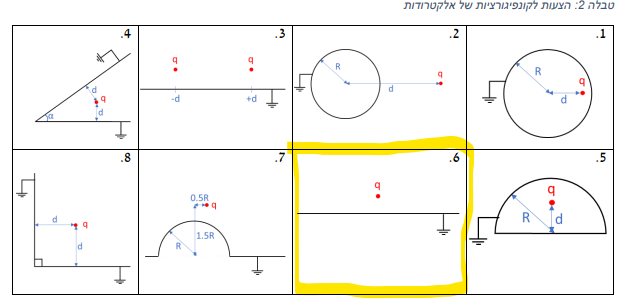

# Constants and parameters

Coordinates are defined by the Conductive paper grid

In [2]:
# ground line center coordinates (x0, y0)
x0, y0 = 14, 5 #cm
# paper size (Lx, Ly)
Lx, Ly = 28, 20 #cm
# charge height over ground
a = 10 #cm
# Voltage applied
Vmax = 20 #V

def potential(x, y, a, C):
    dx = x-x0
    dy = y-y0
    r = np.sqrt((dy - a)**2 + dx**2)
    rmirror = np.sqrt((dy + a)**2 + dx**2)
    V = -C * np.log(r/rmirror)
    return V

def V_y(y, C):
    return potential(x0, y0 +y, a, C)

# Potential change along symmetry axis $y$

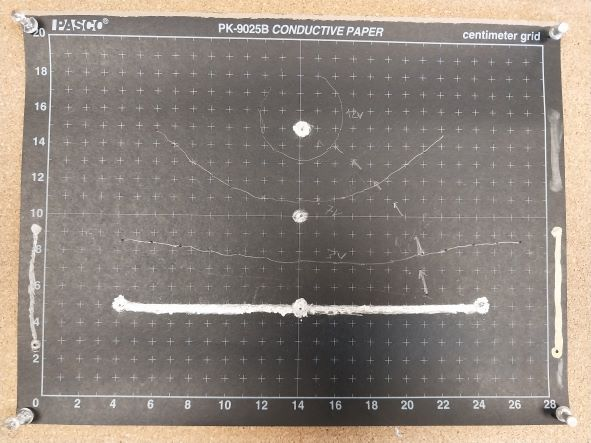

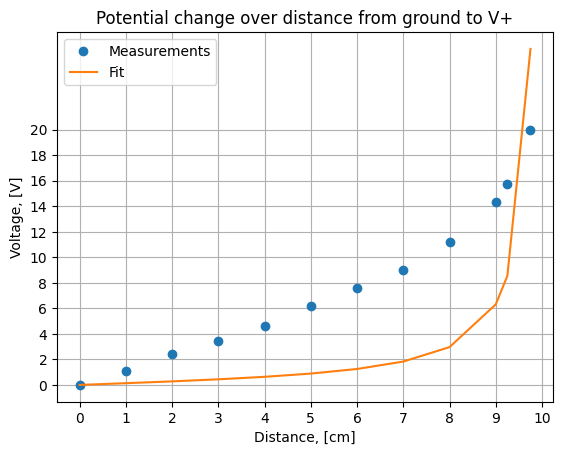

In [3]:
measurements = '''
0 0
1 1.06
2 2.40
3 3.47
4 4.61
5 6.21
6 7.59
7 9.03
8 11.23
9 14.32
9.25 15.78
9.75 19.98
'''
data = np.genfromtxt(measurements.splitlines())
distance, vdata = data.T
plt.plot(distance, vdata,'o', label='Measurements')
plt.title('Potential change over distance from ground to V+')
plt.grid()
plt.xlabel('Distance, [cm]')
plt.ylabel('Voltage, [V]')

popt, _ = cfit(V_y, distance, vdata)
C = popt[0]
plt.plot(distance, potential(x0,y0 + distance, a, C), label='Fit')
plt.xticks(range(0,11,1))
plt.yticks(range(0,21,2))
plt.legend()

# Appendix. Potential field expected

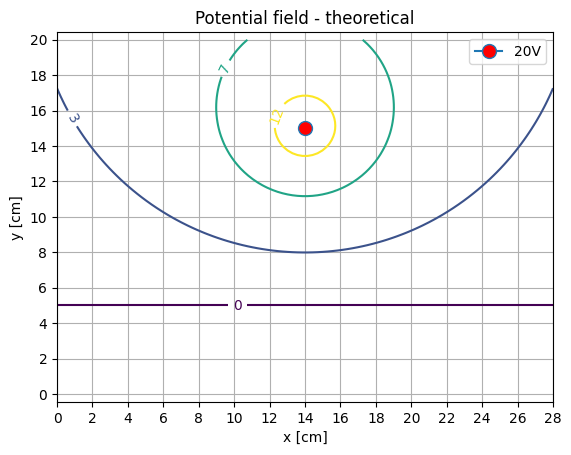

In [ ]:
N = 100
x_space = np.linspace(0, Lx , N) # defines coordinates
y_space = np.linspace(0, Ly , N) # defines coordinates
coord_x, coord_y = np.meshgrid(x_space, y_space)

V_xy = potential(coord_x, coord_y, a, C) # calculates potential at givven coordinates (coord_x, coord_y) using parameters a and C

contours =  plt.contour(coord_x, coord_y, V_xy, [0, 3, 7, 12])
plt.clabel(contours, inline=True)

# +charge
plt.plot(x0, y0+a, marker="o", markersize=10, markerfacecolor="red", label='20V')

plt.xlabel('x [cm]')
plt.xticks(range(0,Lx+1,2))
plt.xlim(0, Lx)
plt.ylabel('y [cm]')
plt.yticks(range(0,Ly+1,2))
plt.ylim(0, Ly)
plt.grid()
plt.axis('equal')

plt.title('Potential field - theoretical')
plt.legend()
plt.show() # displays the figure